# Introduction to PyTorch

In this lesson, we will learn the basics of PyTorch, a popular deep learning framework. We will cover the following topics:

1. Tensors
2. Autograd
3. Building a simple neural network

## 1. Tensors


In [13]:
import torch

# Create a tensor
x = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
print("x:", x)

# Create a tensor of zeros
y = torch.zeros(2, 2)
print("y:", y)

# Create a tensor of ones
z = torch.ones(2, 2)
print("z:", z)

# Create a random tensor
w = torch.rand(2, 2)
print("w:", w)

x: tensor([[1., 2.],
        [3., 4.]])
y: tensor([[0., 0.],
        [0., 0.]])
z: tensor([[1., 1.],
        [1., 1.]])
w: tensor([[0.6548, 0.4344],
        [0.0853, 0.5813]])


In [14]:
device = torch.device('cpu')
N, D_in, H, D_out = 64, 1000, 100, 10
x = torch.randn(N, D_in, device=device)
y = torch.randn(N, D_out, device=device)
w1 = torch.randn(D_in, H, device=device)
w2 = torch.randn(H, D_out, device=device)
learning_rate = 1e-6
for t in range(500):
    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)
    loss = (y_pred - y).pow(2).sum()

    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2


## Using AutoGrad

In [4]:
N, D_in, H, D_out = 64, 1000, 100, 10
x = torch.randn(N, D_in, device=device)
y = torch.randn(N, D_out, device=device)
w1 = torch.randn(D_in, H, device=device)
w2 = torch.randn(H, D_out, device=device)
learning_rate = 1e-6
for t in range(500):
    #TODO
    pass

## Using nn.Module

In [5]:
N, D_in, H, D_out = 64, 1000, 100, 10
x = torch.randn(N, D_in, device=device)
y = torch.randn(N, D_out, device=device)
w1 = torch.randn(D_in, H, device=device)
w2 = torch.randn(H, D_out, device=device)
learning_rate = 1e-6
class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        pass

    def forward(self, x):
        pass
        

 
for t in range(500):
    pass


## 2. Autograd

In [5]:
# Create a tensor with requires_grad=True
import torch
x = torch.tensor([[1., 2.], [3., 4.]], requires_grad=True)
print("x:", x)

# Define a simple function
y = x * x
print("y:", y)

# Compute the gradients, to minimize the loss = sum(x*x)
loss = y.sum()
loss.backward()
print("Gradients of x:", x.grad)

x: tensor([[1., 2.],
        [3., 4.]], requires_grad=True)
y: tensor([[ 1.,  4.],
        [ 9., 16.]], grad_fn=<MulBackward0>)
Gradients of x: tensor([[2., 4.],
        [6., 8.]])


## 3. Building a simple neural network

In [15]:
# Create an instance of the neural network
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Define the neural network
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(2, 8, bias=False)
        self.fc2 = nn.Linear(8, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x
   
net = SimpleNet()

In [16]:
print(net)

# Define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

# Prepare some dummy data and labels
data = torch.tensor([[1., 2.], [3., 4.]], dtype=torch.float32)
labels = torch.tensor([[0.], [1.]], dtype=torch.float32)

# Train the neural network
for epoch in range(500):
    # Forward pass
    outputs = net(data)
    loss = criterion(outputs, labels)

    # IMPORTANT: Zero the gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()
    optimizer.step()

    # Print the loss for this epoch
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{500}], Loss: {loss.item():.4f}")


SimpleNet(
  (fc1): Linear(in_features=2, out_features=8, bias=False)
  (fc2): Linear(in_features=8, out_features=1, bias=True)
)
Epoch [100/500], Loss: 0.0236
Epoch [200/500], Loss: 0.0124
Epoch [300/500], Loss: 0.0065
Epoch [400/500], Loss: 0.0033
Epoch [500/500], Loss: 0.0017


## 4. PyTorch Datasets and DataLoaders

Datasets and DataLoaders are essential components for handling data in PyTorch. A Dataset is a collection of data, and a DataLoader helps to efficiently load the data in batches during training.

In this example, we'll use the FashionMNIST dataset, which contains 60,000 training images and 10,000 testing images of 10 different clothing items.

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

# Define data transformations
transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
]) 

# Load the FashionMNIST dataset
train_dataset = torchvision.datasets.FashionMNIST(
    root='./data', train=True, download=True, transform=transform
)

test_dataset = torchvision.datasets.FashionMNIST(
    root='./data', train=False, download=True, transform=transform
)

# Create DataLoaders for train and test datasets
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=512, shuffle=True, num_workers=1
)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=512, shuffle=False, num_workers=1
)

print("Num training examples: {}".format(len(train_dataset)))
print("Num test examples: {}".format(len(test_dataset)))


# List of class labels
classes = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

Num training examples: 60000
Num test examples: 10000


## Visualizing Examples from the FashionMNIST Dataset

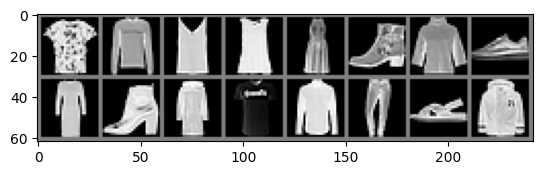

Shirt -- Pullover -- Shirt -- Shirt -- Dress -- Ankle boot -- Pullover -- Sneaker
Dress -- Ankle boot -- Coat -- T-shirt/top -- Shirt -- Trouser -- Sandal -- Coat


In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Function to unnormalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get a batch of training data
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Display the images in a grid along with their labels
imshow(torchvision.utils.make_grid(images[:16]))
print(" -- ".join(f"{classes[labels[j]]}" for j in range(8)))
print(" -- ".join(f"{classes[labels[j]]}" for j in range(8,16)))

With the dataset loaded and the DataLoader created, we can now train our neural network using the FashionMNIST dataset. Let's modify our previous SimpleNet example to handle 28x28 images and 10 output classes.

In [19]:
import torch.nn.functional as F

# Define the neural network for FashionMNIST
class FashionMNISTNet(nn.Module):
    def __init__(self):
        super(FashionMNISTNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3)
        self.fc1 = nn.Linear(32 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Create an instance of the neural network
net = FashionMNISTNet()
print(net)

# Move the model to the GPU if available
net.to(device)

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

# Train the neural network using the FashionMNIST dataset
num_epochs = 5
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader, 0):

        # Move the inputs and labels to the GPU if available
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)
        
        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        # Update the running loss
        running_loss += loss.item()

    # Print the average loss for this epoch
    avg_loss = running_loss / (i + 1)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}")
print("Training finished.")

In [ ]:
# Test the neural network
correct = 0
total = 0

# Set the model to evaluation mode
net.eval()

# Disable gradient calculation
with torch.no_grad():
    for inputs, labels in test_loader:

        # Move the inputs and labels to the GPU if available
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = net(inputs)

        # Get the predicted class
        _, predicted = torch.max(outputs.data, 1)

        # Update the total number of samples and correct predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate the accuracy
accuracy = 100 * correct / total
print(f"Accuracy: {accuracy:.2f}%")

In [20]:
def train(model, train_loader, criterion, optimizer, device):
    correct = 0
    total = 0
    running_loss = 0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        
        # Move the inputs and labels to the GPU if available
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        
        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        # Update the running loss
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)

        # Update the total number of samples and correct predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate the accuracy
    accuracy = 100 * correct / total
    return running_loss, accuracy
    # Print the average loss for this epoch
    

In [21]:
def test(model, test_loader, criterion, optimizer, device):
    correct = 0
    total = 0
    total_loss = 0
    # Set the model to evaluation mode
    net.eval()

    # Disable gradient calculation
    with torch.no_grad():
        for inputs, labels in test_loader:

            # Move the inputs and labels to the GPU if available
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss +=loss.item()
            # Get the predicted class
            _, predicted = torch.max(outputs.data, 1)

            # Update the total number of samples and correct predictions
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Calculate the accuracy
    accuracy = 100 * correct / total
    return total_loss, accuracy

In [22]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Create an instance of the neural network
net = FashionMNISTNet()
print(net)

# Move the model to the GPU if available
net.to(device)
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=512, shuffle=True, num_workers=1
)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=512, shuffle=False, num_workers=1
)
# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
num_epochs = 20
train_loss_list = []
test_loss_list  = []
train_acc_list = []
test_acc_list = []
for epoch in range(num_epochs):
    train_loss, train_acc = train(net, train_loader, criterion, optimizer, device)
    test_loss, test_acc = test(net, test_loader, criterion, optimizer, device)
    train_loss = 1e4*train_loss / len(train_dataset)
    test_loss = 1e4*test_loss / len(test_dataset)
    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print(f"Epoch [{epoch + 1}/{num_epochs}], train loss: {train_loss:.4f}, train accuracy: {train_acc:.4f}" )
    print(f"Epoch [{epoch + 1}/{num_epochs}], test loss: {test_loss:.4f}, test accuracy: {test_acc:.4f}" )

Using device: cuda:0
FashionMNISTNet(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)
Epoch [1/20], train loss: 36.3758, train accuracy: 38.6633
Epoch [1/20], test loss: 17.3648, test accuracy: 66.8600
Epoch [2/20], train loss: 13.6180, train accuracy: 73.8200
Epoch [2/20], test loss: 12.3623, test accuracy: 76.7400
Epoch [3/20], train loss: 11.1936, train accuracy: 78.4517
Epoch [3/20], test loss: 11.2683, test accuracy: 78.4200
Epoch [4/20], train loss: 10.0778, train accuracy: 80.7267
Epoch [4/20], test loss: 10.5125, test accuracy: 80.0700
Epoch [5/20], train loss: 9.3833, train accuracy: 82.2350
Epoch [5/20], test loss: 9.7524, test accuracy: 8

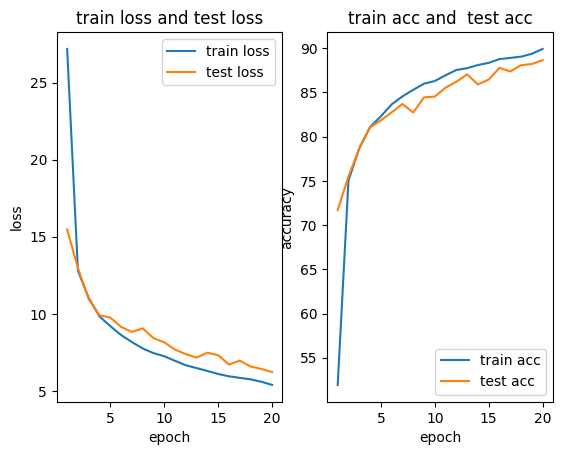

In [8]:
import matplotlib.pyplot as plt
x = [i for i in range(1, num_epochs+1)]

plt.subplot(1,2,1)
plt.title("train loss and test loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(x, train_loss_list)
plt.plot(x, test_loss_list)
plt.legend(["train loss", "test loss"])
plt.subplot(1,2,2)
plt.title("train acc and  test acc")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.plot(x, train_acc_list)
plt.plot(x, test_acc_list)
plt.legend(["train acc", "test acc"])
plt.show()

## How does learning rate affect training?

In [13]:
lr_rate = [1e-3, 1e-2, 1e-1, 2e-1]
train_loss_dict = {}
test_loss_dict = {}
train_acc_dict = {}
test_acc_dict = {}
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
for lr in lr_rate:
    net = FashionMNISTNet()

    # Move the model to the GPU if available
    net.to(device)
    train_loader = torch.utils.data.DataLoader(
        train_dataset, batch_size=512, shuffle=True, num_workers=1
    )

    test_loader = torch.utils.data.DataLoader(
        test_dataset, batch_size=512, shuffle=False, num_workers=1
    )
    # Define the loss function and the optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)
    num_epochs = 20
    train_loss_list = []
    test_loss_list  = []
    train_acc_list = []
    test_acc_list = []
    for epoch in range(num_epochs):
        train_loss, train_acc = train(net, train_loader, criterion, optimizer, device)
        test_loss, test_acc = test(net, test_loader, criterion, optimizer, device)
        train_loss = 1e4*train_loss / len(train_dataset)
        test_loss = 1e4*test_loss / len(test_dataset)
        train_loss_list.append(train_loss)
        test_loss_list.append(test_loss)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
    train_loss_dict[str(lr)] = train_loss_list
    train_acc_dict[str(lr)] = train_acc_list
    test_loss_dict[str(lr)] = test_loss_list
    test_acc_dict[str(lr)] = test_acc_list

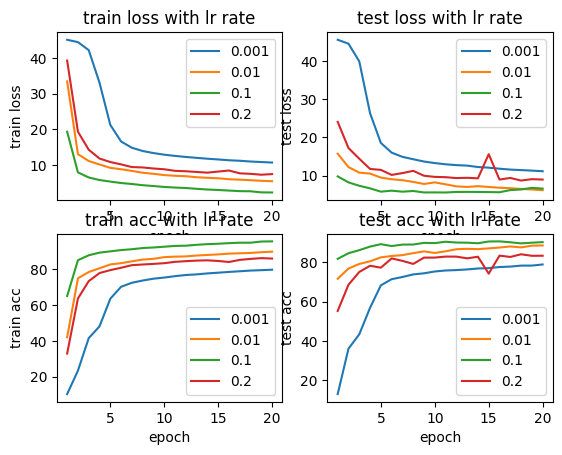

In [15]:
x = [i for i in range(1, num_epochs+1)]

plt.subplot(2,2,1)
plt.title("train loss with lr rate")
plt.xlabel("epoch")
plt.ylabel("train loss")
for value in list(train_loss_dict.values()):
    plt.plot(x, value)
plt.legend(list(train_loss_dict.keys()))
plt.subplot(2,2,2)
plt.title("test loss with lr rate")
plt.xlabel("epoch")
plt.ylabel("test loss")
for value in list(test_loss_dict.values()):
    plt.plot(x, value)
plt.legend(list(test_loss_dict.keys()))
plt.subplot(2,2,3)
plt.title("train acc with lr rate")
plt.xlabel("epoch")
plt.ylabel("train acc")
for value in list(train_acc_dict.values()):
    plt.plot(x, value)
plt.legend(list(train_acc_dict.keys()))
plt.subplot(2,2,4)
plt.title("test acc with lr rate")
plt.xlabel("epoch")
plt.ylabel("test acc")
for value in list(test_acc_dict.values()):
    plt.plot(x, value)
plt.legend(list(test_acc_dict.keys()))
plt.show()

## How does batch size affect training?

In [11]:
batch_size = [64, 128, 512]
train_loss_dict = {}
test_loss_dict = {}
train_acc_dict = {}
test_acc_dict = {}
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
for bsz in batch_size:
    net = FashionMNISTNet()

    # Move the model to the GPU if available
    net.to(device)
    train_loader = torch.utils.data.DataLoader(
        train_dataset, batch_size=bsz, shuffle=True, num_workers=1
    )

    test_loader = torch.utils.data.DataLoader(
        test_dataset, batch_size=bsz, shuffle=False, num_workers=1
    )
    # Define the loss function and the optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
    num_epochs = 20
    train_loss_list = []
    test_loss_list  = []
    train_acc_list = []
    test_acc_list = []
    for epoch in range(num_epochs):
        train_loss, train_acc = train(net, train_loader, criterion, optimizer, device)
        test_loss, test_acc = test(net, test_loader, criterion, optimizer, device)
        train_loss = 1e4*train_loss / len(train_dataset)
        test_loss = 1e4*test_loss / len(test_dataset)
        train_loss_list.append(train_loss)
        test_loss_list.append(test_loss)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
    train_loss_dict[str(bsz)] = train_loss_list
    train_acc_dict[str(bsz)] = train_acc_list
    test_loss_dict[str(bsz)] = test_loss_list
    test_acc_dict[str(bsz)] = test_acc_list

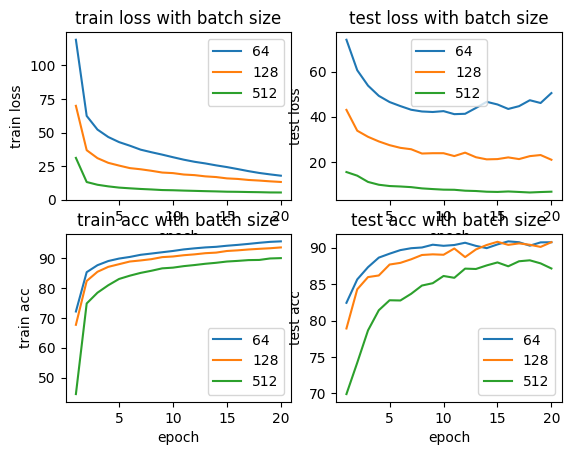

In [12]:
x = [i for i in range(1, num_epochs+1)]

plt.subplot(2,2,1)
plt.title("train loss with batch size")
plt.xlabel("epoch")
plt.ylabel("train loss")
for value in list(train_loss_dict.values()):
    plt.plot(x, value)
plt.legend(list(train_loss_dict.keys()))
plt.subplot(2,2,2)
plt.title("test loss with batch size")
plt.xlabel("epoch")
plt.ylabel("test loss")
for value in list(test_loss_dict.values()):
    plt.plot(x, value)
plt.legend(list(test_loss_dict.keys()))
plt.subplot(2,2,3)
plt.title("train acc with batch size")
plt.xlabel("epoch")
plt.ylabel("train acc")
for value in list(train_acc_dict.values()):
    plt.plot(x, value)
plt.legend(list(train_acc_dict.keys()))
plt.subplot(2,2,4)
plt.title("test acc with batch size")
plt.xlabel("epoch")
plt.ylabel("test acc")
for value in list(test_acc_dict.values()):
    plt.plot(x, value)
plt.legend(list(test_acc_dict.keys()))
plt.show()

## Weight initialize

In [23]:
def weight_init(module):
    if type(module) == nn.Conv2d:
        nn.init.normal_(module.weight, mean=0, std=0.5)
    elif type(module) == nn.Linear:
        nn.init.uniform_(module.weight, a=-0.1, b=0.1)
        nn.init.constant_(module.bias, 0.1)
    

In [9]:
init_list = [False, True]
train_loss_dict = {}
test_loss_dict = {}
train_acc_dict = {}
test_acc_dict = {}
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
for init in init_list:
    net = FashionMNISTNet()
    if init:
        net.apply(weight_init)
    # Move the model to the GPU if available
    net.to(device)
    train_loader = torch.utils.data.DataLoader(
        train_dataset, batch_size=512, shuffle=True, num_workers=1
    )

    test_loader = torch.utils.data.DataLoader(
        test_dataset, batch_size=512, shuffle=False, num_workers=1
    )
    # Define the loss function and the optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
    num_epochs = 20
    train_loss_list = []
    test_loss_list  = []
    train_acc_list = []
    test_acc_list = []
    for epoch in range(num_epochs):
        train_loss, train_acc = train(net, train_loader, criterion, optimizer, device)
        test_loss, test_acc = test(net, test_loader, criterion, optimizer, device)
        train_loss = 1e4*train_loss / len(train_dataset)
        test_loss = 1e4*test_loss / len(test_dataset)
        train_loss_list.append(train_loss)
        test_loss_list.append(test_loss)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        # print(train_loss)
    train_loss_dict[str(init)] = train_loss_list
    train_acc_dict[str(init)] = train_acc_list
    test_loss_dict[str(init)] = test_loss_list
    test_acc_dict[str(init)] = test_acc_list

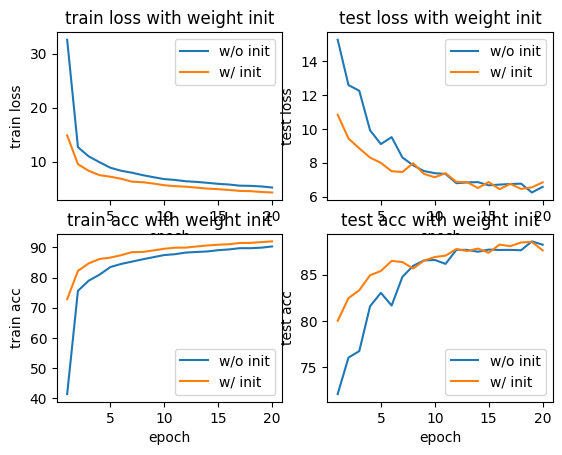

In [10]:
x = [i for i in range(1, num_epochs+1)]

plt.subplot(2,2,1)
plt.title("train loss with weight init")
plt.xlabel("epoch")
plt.ylabel("train loss")
for value in list(train_loss_dict.values()):
    plt.plot(x, value)
plt.legend(["w/o init", "w/ init"])
plt.subplot(2,2,2)
plt.title("test loss with weight init")
plt.xlabel("epoch")
plt.ylabel("test loss")
for value in list(test_loss_dict.values()):
    plt.plot(x, value)
plt.legend(["w/o init", "w/ init"])
plt.subplot(2,2,3)
plt.title("train acc with weight init")
plt.xlabel("epoch")
plt.ylabel("train acc")
for value in list(train_acc_dict.values()):
    plt.plot(x, value)
plt.legend(["w/o init", "w/ init"])
plt.subplot(2,2,4)
plt.title("test acc with weight init")
plt.xlabel("epoch")
plt.ylabel("test acc")
for value in list(test_acc_dict.values()):
    plt.plot(x, value)
plt.legend(["w/o init", "w/ init"])
plt.show()

## Now it's your turn!

You can try everything you want, such as Batch normalization(`nn.BatchNorm2d()`) and dropout(`nn.Dropout()`)

In [ ]:
class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        pass

    def forward(self, x):
        pass

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Create an instance of the neural network
net = MyNet ()
print(net)

# Move the model to the GPU if available
net.to(device)

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

# Train the neural network using the FashionMNIST dataset
num_epochs = 5
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader, 0):

        # Move the inputs and labels to the GPU if available
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)
        
        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        # Update the running loss
        running_loss += loss.item()

    # Print the average loss for this epoch
    avg_loss = running_loss / (i + 1)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}")
print("Training finished.")

In [ ]:
# Test the neural network
correct = 0
total = 0

# Set the model to evaluation mode
net.eval()

# Disable gradient calculation
with torch.no_grad():
    for inputs, labels in test_loader:

        # Move the inputs and labels to the GPU if available
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = net(inputs)

        # Get the predicted class
        _, predicted = torch.max(outputs.data, 1)

        # Update the total number of samples and correct predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate the accuracy
accuracy = 100 * correct / total
print(f"Accuracy: {accuracy:.2f}%")

## Bonus: How to track the gradient information of each layer in a neural network?

Hint:

1. torch.autograd.grad()

2. register_hook()